In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline


In [68]:
# this csv file has an evaluation of Sno and r-r values
df = pd.read_csv("/home/mohit/Documents/ecg vs r-r values/2000-3000.csv")

In [69]:
df.head(1000)

,ecg,Rrvalues
0,-1.3776,0.670
1,-1.3608,0.674
2,-1.3653,0.679
3,-1.3534,0.708
4,-1.3737,0.728
...,...,...
995,-1.3597,0.704
996,-1.3638,0.707
997,-1.3648,0.700
998,-1.4018,0.717


In [70]:
df.describe()

,ecg,Rrvalues
count,1001.000000,1001.000000
mean,-1.363034,0.760329
std,0.057139,0.045376
min,-2.182000,0.641000
25%,-1.371800,0.732000
50%,-1.364500,0.757000
75%,-1.356700,0.782000
max,-0.266600,0.917000


In [71]:
df.shape

(1001, 2)

In [72]:
cdf = df[['ecg','Rrvalues']]
cdf.head(5)

,ecg,Rrvalues
0,-1.3776,0.670
1,-1.3608,0.674
2,-1.3653,0.679
3,-1.3534,0.708
4,-1.3737,0.728


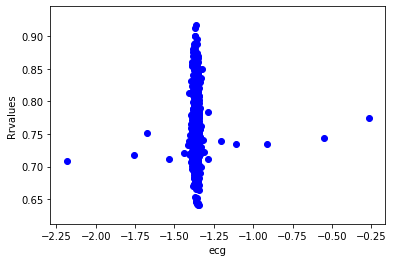

In [73]:
#graph of SNO vs r-r values

plt.scatter(cdf.ecg, cdf.Rrvalues,color='blue')
plt.xlabel('ecg')
plt.ylabel('Rrvalues')
plt.show()

In [74]:
#splitting our data in 80-20 ratio for regression

In [75]:
#taking 20% test data 
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

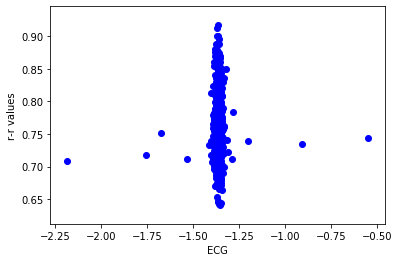

In [76]:
#plotting our training data of Sno vs r-r values
plt.scatter(train.ecg, train.Rrvalues,  color='blue')
plt.xlabel("ECG")
plt.ylabel("r-r values")
plt.show()

In [77]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ecg']])
train_y = np.asanyarray(train[['Rrvalues']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[0.01529576]]
Intercept:  [0.78182163]


Text(0, 0.5, 'r-r values')

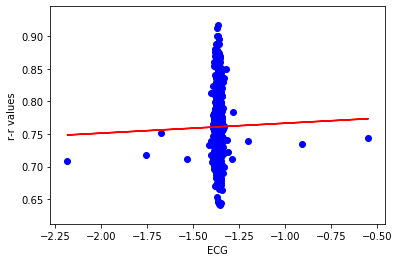

In [78]:
plt.scatter(train.ecg, train.Rrvalues,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("ECG")
plt.ylabel("r-r values")

In [79]:
# checking accuracy of data by linear regression
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ecg']])
test_y = np.asanyarray(test[['Rrvalues']])
test_y_hat = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_hat , test_y) )

Mean absolute error: 0.04
Residual sum of squares (MSE): 0.00
R2-score: -1420.97


In [80]:
#using polynomial regression

In [81]:
#generating a matrix of all polynomial combinations

from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
train_x = np.asanyarray(train[['ecg']])
train_y = np.asanyarray(train[['Rrvalues']])

test_x = np.asanyarray(test[['ecg']])
test_y = np.asanyarray(test[['Rrvalues']])


poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(train_x)
train_x_poly

array([[ 1.        , -1.3776    ,  1.89778176],
       [ 1.        , -1.3653    ,  1.86404409],
       [ 1.        , -1.3534    ,  1.83169156],
       ...,
       [ 1.        , -1.3648    ,  1.86267904],
       [ 1.        , -1.4018    ,  1.96504324],
       [ 1.        , -1.4045    ,  1.97262025]])

In [82]:
# training our ploynomial regression model
clf = linear_model.LinearRegression()
train_y_ = clf.fit(train_x_poly, train_y)
# The coefficients
print ('Coefficients: ', clf.coef_)
print ('Intercept: ',clf.intercept_)

Coefficients:  [[ 0.         -0.16157643 -0.06480069]]
Intercept:  [0.661287]


Text(0, 0.5, 'Rrvalues')

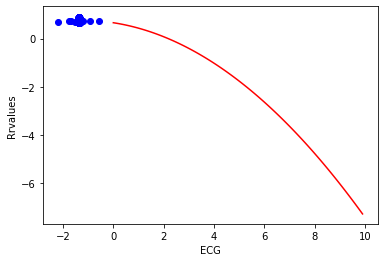

In [83]:
#plotting the polynomial regression
plt.scatter(train.ecg, train.Rrvalues,  color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = clf.intercept_[0]+ clf.coef_[0][1]*XX+ clf.coef_[0][2]*np.power(XX, 2)
plt.plot(XX, yy, '-r' )
plt.xlabel("ECG")
plt.ylabel("Rrvalues")

In [84]:
#getting the accuracy of our polynomial regression model
from sklearn.metrics import r2_score

test_x_poly = poly.fit_transform(test_x)
test_y_ = clf.predict(test_x_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

Mean absolute error: 0.04
Residual sum of squares (MSE): 0.00
R2-score: -115.75
